In [ ]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.24" 2024-07-16
OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04)
OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)


In [ ]:
!pip install h2o

In [ ]:
 import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,27 mins 49 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_9q7wa2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.158 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
churn_df = h2o.import_file('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
churn_df.isna()

isNA(customerID),isNA(gender),isNA(SeniorCitizen),isNA(Partner),isNA(Dependents),isNA(tenure),isNA(PhoneService),isNA(MultipleLines),isNA(InternetService),isNA(OnlineSecurity),isNA(OnlineBackup),isNA(DeviceProtection),isNA(TechSupport),isNA(StreamingTV),isNA(StreamingMovies),isNA(Contract),isNA(PaperlessBilling),isNA(PaymentMethod),isNA(MonthlyCharges),isNA(TotalCharges),isNA(Churn)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.8, .16])

In [ ]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No


In [ ]:
y = "Churn"
x = churn_df.columns
x.remove(y)


In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [ ]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
11:02:53.113: Project: AutoML_2_20241019_110253
11:02:53.113: Cross-validation disabled by user: no fold column nor nfolds > 1.
11:02:53.113: Setting stopping tolerance adaptively based on the training frame: 0.013301448074460369
11:02:53.113: Build control seed: 10
11:02:53.114: training frame: Frame key: AutoML_2_20241019_110253_training_py_19_sid_9f25    cols: 21    rows: 5652  chunks: 8    size: 260838  checksum: -1555806992806103000
11:02:53.114: validation frame: Frame key: py_21_sid_9f25    cols: 21    rows: 289  chunks: 8    size: 84548  checksum: 4878716389046357539
11:02:53.114: leaderboard frame: Frame key: py_21_sid_9f25    cols: 21    rows: 289  chunks: 8    size: 84548  checksum: 4878716389046357539
11:02:53.114: blending frame: NULL
11:02:53.114: response column: Churn
11:02:53.114: fold column: null
11:02:53.114: weights column: null
11:02:53.122: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20241019_110253


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10456740236296869
RMSE: 0.32336883332035676
LogLoss: 0.33038597192781355
Mean Per-Class Error: 0.17807133613364645
AUC: 0.912053240933226
AUCPR: 0.7882802219331996
Gini: 0.8241064818664521

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40114685893058777
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3676  489    0.1174   (489.0/4165.0)
Yes    355   1132   0.2387   (355.0/1487.0)
Total  4031  1621   0.1493   (844.0/5652.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.401147     0.728443  190
max f2                       0.191101     0.810007  279
max f0point5                 0.511344     0.738107  148
max accuracy                 0.491231     0.855272  155
max precision                0.974743     1         0
max recall                   0.017834     1         382
max specificity              0.974743     1         0
max absolute_mcc             0.401147     0.626837  190
max min_per_class_accuracy   0.321911     0.826651  223
max mean_per_class_accuracy  0.288116     0.831453  235
max tns                      0.974743     4165      0
max fns                      0.974743     1486      0
max fps                      0.000862121  4165      399
max tps                      0.017834     1487      382
max tnr                      0.974743     1         0
max fnr                      0.974743     0.999328  0
max fpr                      0.000862121  1         399
max tpr                      0.017834     1         382

Gains/Lift Table: Avg response rate: 26.31 %, avg score: 26.59 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100849                   0.915698           3.80094    3.80094            1                0.931676    1                           0.931676            0.0383322       0.0383322                  280.094   280.094            0.0383322
2        0.0201699                   0.884643           3.66758    3.73426            0.964912         0.898484    0.982456                    0.91508             0.0369872       0.0753194                  266.758   273.426            0.0748392
3        0.0300778                   0.863282           3.46157    3.64443            0.910714         0.873348    0.958824                    0.901333            0.0342972       0.109617                   246.157   264.443            0.107936
4        0.0401628                   0.835691           3.46753    3.60001            0.912281         0.847417    0.947137                    0.887795            0.0349697       0.144586                   246.753   260.001            0.141705
5        0.0500708                   0.811793           3.32582    3.54575            0.875            0.822889    0.932862                    0.874951            0.0329523       0.177539                   232.582   254.575            0.172977
6        0.100142                    0.709689           3.07567    3.31071            0.809187         0.756272    0.871025                    0.815611            0.154001        0.33154                    207.567   231.071            0.314013
7        0.150035                    0.623242           2.87092    3.1

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_2_20241019_110253,0.85119,0.41932,0.71647,0.227236,0.373227,0.139298
GLM_1_AutoML_2_20241019_110253,0.849013,0.426815,0.702938,0.228891,0.37672,0.141918
XRT_1_AutoML_2_20241019_110253,0.841173,0.434594,0.696343,0.232898,0.377666,0.142632
GBM_3_AutoML_2_20241019_110253,0.840476,0.43216,0.68748,0.227613,0.380003,0.144403
GBM_2_AutoML_2_20241019_110253,0.838763,0.43522,0.692808,0.246951,0.381549,0.14558
GBM_1_AutoML_2_20241019_110253,0.836731,0.432459,0.695556,0.238269,0.379487,0.14401
XGBoost_1_AutoML_2_20241019_110253,0.832375,0.444308,0.666538,0.240999,0.386824,0.149633
GBM_4_AutoML_2_20241019_110253,0.831417,0.449582,0.669203,0.228891,0.387644,0.150268
XGBoost_2_AutoML_2_20241019_110253,0.828165,0.452751,0.681639,0.250552,0.39058,0.152553
DRF_1_AutoML_2_20241019_110253,0.821603,0.449394,0.655035,0.223229,0.390676,0.152627


In [ ]:
churn_pred=aml.leader.predict(churn_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()

predict,No,Yes
No,0.984068,0.015932
Yes,0.658077,0.341923
No,0.801949,0.198051
No,0.95054,0.0494597
No,0.86502,0.13498
Yes,0.166069,0.833931
Yes,0.343251,0.656749
Yes,0.353297,0.646703
No,0.77926,0.22074
No,0.987961,0.0120392


In [ ]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.1368683118980041
RMSE: 0.3699571757622821
LogLoss: 0.423930994647386
Mean Per-Class Error: 0.24067581555310694
AUC: 0.8430185481986043
AUCPR: 0.671053762521101
Gini: 0.6860370963972087

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36666300892829895
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     676   128    0.1592   (128.0/804.0)
Yes    96    202    0.3221   (96.0/298.0)
Total  772   330    0.2033   (224.0/1102.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.366663     0.643312  187
max f2                       0.0739601    0.748011  331
max f0point5                 0.464263     0.652504  146
max accuracy                 0.464263     0.810345  146
max precision                0.94326      1         0
max recall                   0.0113049    1         386
max specificity              0.94326      1         0
max absolute_mcc             0.366663     0.502972  187
max min_per_class_accuracy   0.275638     0.751678  229
max mean_per_class_accuracy  0.317815     0.762914  209
max tns                      0.94326      804       0
max fns                      0.94326      297       0
max fps                      0.000641543  804       399
max tps                      0.0113049    298       386
max tnr                      0.94326      1         0
max fnr                      0.94326      0.996644  0
max fpr                      0.000641543  1         399
max tpr                      0.0113049    1         386

Gains/Lift Table: Avg response rate: 27.04 %, avg score: 25.69 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0108893                   0.891443           3.69799    3.69799            1                0.906651   1                           0.906651            0.0402685       0.0402685                  269.799   269.799            0.0402685
2        0.0208711                   0.851291           2.68944    3.21564            0.727273         0.86572    0.869565                    0.887075            0.0268456       0.0671141                  168.944   221.564            0.0633828
3        0.030853                    0.833837           2.68944    3.0454             0.727273         0.843104   0.823529                    0.872849            0.0268456       0.0939597                  168.944   204.54             0.086497
4        0.0408348                   0.81054            3.02563    3.04057            0.818182         0.822015   0.822222                    0.860423            0.0302013       0.124161                   202.563   204.057            0.114211
5        0.0508167                   0.77761            3.02563    3.03763            0.818182         0.795765   0.821429                    0.847722            0.0302013       0.154362                   202.563   203.763            0.141925
6        0.100726                    0.693722           2.82392    2.93174            0.763636         0.735534   0.792793                    0.792134            0.14094         0.295302                   182.392   193.174            0.266695
7        0.150635                    0.600369           2.28603    2.7178             0.618182         0.642233   0.73494                     0.742468            0.114094        0.409396                   128.603   171.78             0.35467
8        0.20054

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['XGBoost_3_AutoML_2_20241019_110253',
 'GLM_1_AutoML_2_20241019_110253',
 'XRT_1_AutoML_2_20241019_110253',
 'GBM_3_AutoML_2_20241019_110253',
 'GBM_2_AutoML_2_20241019_110253',
 'GBM_1_AutoML_2_20241019_110253',
 'XGBoost_1_AutoML_2_20241019_110253',
 'GBM_4_AutoML_2_20241019_110253',
 'XGBoost_2_AutoML_2_20241019_110253',
 'DRF_1_AutoML_2_20241019_110253']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20241019_110253


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10456740236296869
RMSE: 0.32336883332035676
LogLoss: 0.33038597192781355
Mean Per-Class Error: 0.17807133613364645
AUC: 0.912053240933226
AUCPR: 0.7882802219331996
Gini: 0.8241064818664521

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40114685893058777
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3676  489    0.1174   (489.0/4165.0)
Yes    355   1132   0.2387   (355.0/1487.0)
Total  4031  1621   0.1493   (844.0/5652.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.401147     0.728443  190
max f2                       0.191101     0.810007  279
max f0point5                 0.511344     0.738107  148
max accuracy                 0.491231     0.855272  155
max precision                0.974743     1         0
max recall                   0.017834     1         382
max specificity              0.974743     1         0
max absolute_mcc             0.401147     0.626837  190
max min_per_class_accuracy   0.321911     0.826651  223
max mean_per_class_accuracy  0.288116     0.831453  235
max tns                      0.974743     4165      0
max fns                      0.974743     1486      0
max fps                      0.000862121  4165      399
max tps                      0.017834     1487      382
max tnr                      0.974743     1         0
max fnr                      0.974743     0.999328  0
max fpr                      0.000862121  1         399
max tpr                      0.017834     1         382

Gains/Lift Table: Avg response rate: 26.31 %, avg score: 26.59 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100849                   0.915698           3.80094    3.80094            1                0.931676    1                           0.931676            0.0383322       0.0383322                  280.094   280.094            0.0383322
2        0.0201699                   0.884643           3.66758    3.73426            0.964912         0.898484    0.982456                    0.91508             0.0369872       0.0753194                  266.758   273.426            0.0748392
3        0.0300778                   0.863282           3.46157    3.64443            0.910714         0.873348    0.958824                    0.901333            0.0342972       0.109617                   246.157   264.443            0.107936
4        0.0401628                   0.835691           3.46753    3.60001            0.912281         0.847417    0.947137                    0.887795            0.0349697       0.144586                   246.753   260.001            0.141705
5        0.0500708                   0.811793           3.32582    3.54575            0.875            0.822889    0.932862                    0.874951            0.0329523       0.177539                   232.582   254.575            0.172977
6        0.100142                    0.709689           3.07567    3.31071            0.809187         0.756272    0.871025                    0.815611            0.154001        0.33154                    207.567   231.071            0.314013
7        0.150035                    0.623242           2.87092    3.1

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_2_20241019_110253',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_2_20241019_110253'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20241019_110253_training_py_19_sid_9f25',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20241019_110253_training_py_19_sid_9f25'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20241019_110253_training_py_19_sid_9f25',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20241019_110253_training_py_19_sid_9f25'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    's

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 35)

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

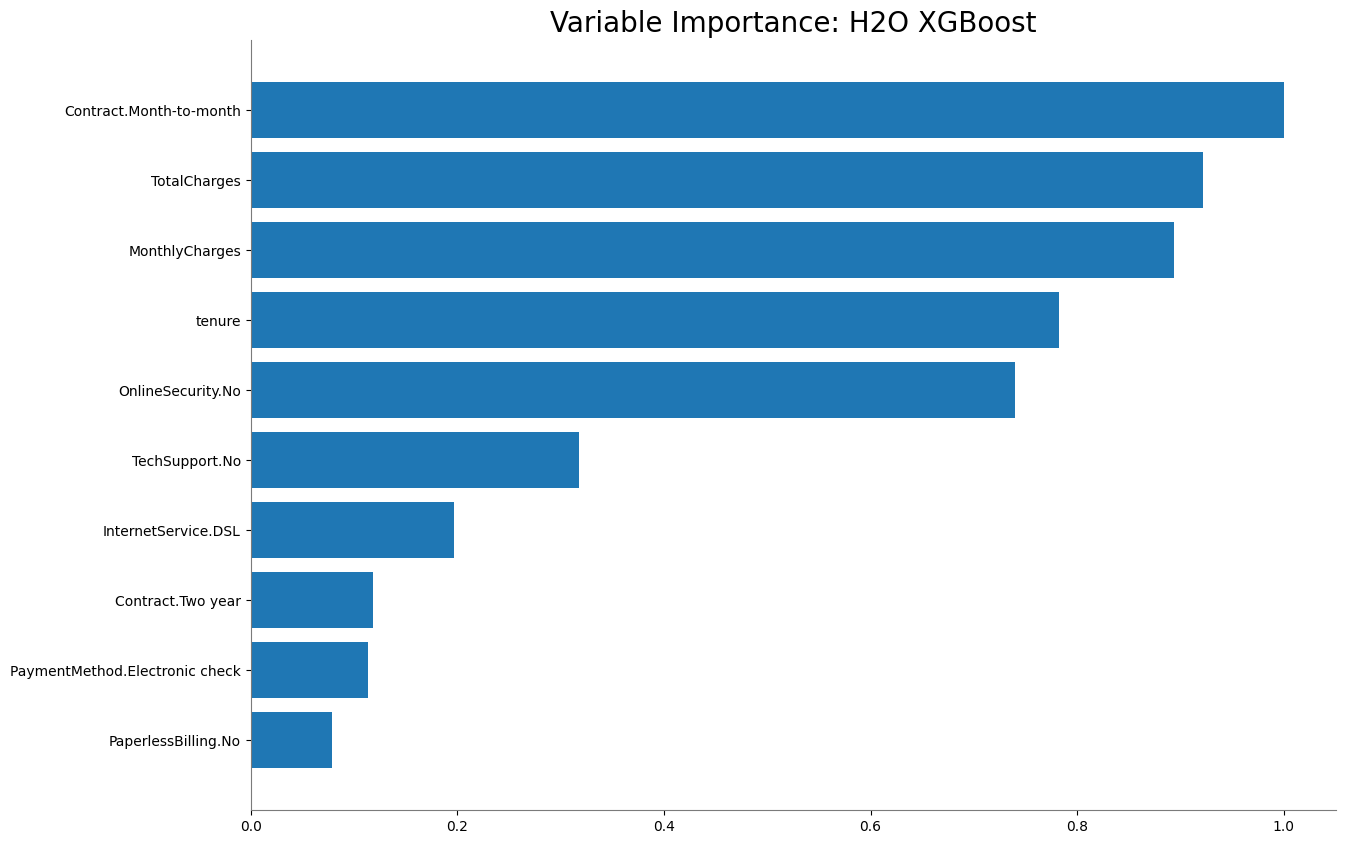

<Figure size 640x480 with 0 Axes>

In [ ]:
out.varimp_plot()